# 1. Generiranje linearno nerazdvojivih podataka

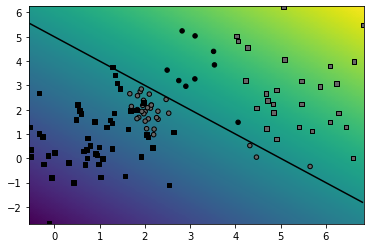

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import data

np.random.seed(100)
  
# get data
X,Y_ = data.sample_gmm_2d(4, 2, 30)
# X,Y_ = data.sample_gauss_2d(2, 100)

# get the class predictions
Y = data.myDummyDecision(X)>0.5  

# graph the decision surface
rect=(np.min(X, axis=0), np.max(X, axis=0))
data.graph_surface(data.myDummyDecision, rect, offset=0)
  
# graph the data points
data.graph_data(X, Y_, Y, special=[])

plt.show()


# 2. Višeslojna klasifikacija u Pythonu (20% bodova)

In [ ]:
import fcann2

In [ ]:
np.random.seed(100)
X,Y_ = data.sample_gmm_2d(6,2,10)
W2, b2, W1, b1 = fcann2.fcann2_train(X,Y_)


# 3. Linearna regresija u PyTorchu (10% bodova)

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim


## Definicija računskog grafa
# podaci i parametri, inicijalizacija parametara
a = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

X = torch.tensor([1, 2])
Y = torch.tensor([3, 5])

# optimizacijski postupak: gradijentni spust
optimizer = optim.SGD([a, b], lr=0.1)

for i in range(100):
    # afin regresijski model
    Y_ = a*X + b

    diff = (Y-Y_)

    # kvadratni gubitak
    loss = torch.sum(diff**2)

    # računanje gradijenata
    loss.backward()

    # korak optimizacije
    optimizer.step()

    # Postavljanje gradijenata na nulu
    optimizer.zero_grad()

    if i % 10 == 0:
        print(f'step: {i}, loss:{loss}, Y_:{Y_}, a:{a}, b:{b}')

step: 0, loss:58.77910232543945, Y_:tensor([-0.7938, -1.6623], grad_fn=<AddBackward0>), a:tensor([2.5552], requires_grad=True), b:tensor([2.1659], requires_grad=True)
step: 10, loss:0.041944436728954315, Y_:tensor([3.1740, 4.8920], grad_fn=<AddBackward0>), a:tensor([1.7264], requires_grad=True), b:tensor([1.4428], requires_grad=True)
step: 20, loss:0.02319810539484024, Y_:tensor([3.1296, 4.9199], grad_fn=<AddBackward0>), a:tensor([1.7965], requires_grad=True), b:tensor([1.3293], requires_grad=True)
step: 30, loss:0.012830091640353203, Y_:tensor([3.0964, 4.9405], grad_fn=<AddBackward0>), a:tensor([1.8486], requires_grad=True), b:tensor([1.2449], requires_grad=True)
step: 40, loss:0.007095878943800926, Y_:tensor([3.0717, 4.9557], grad_fn=<AddBackward0>), a:tensor([1.8874], requires_grad=True), b:tensor([1.1821], requires_grad=True)
step: 50, loss:0.003924504388123751, Y_:tensor([3.0533, 4.9671], grad_fn=<AddBackward0>), a:tensor([1.9163], requires_grad=True), b:tensor([1.1354], requires_

# Zadaci

Ponovite osnove PyTorcha navedene u odjeljcima 0b i 0c. Analizirajte prikazani program te provjerite ispravnost izvođenja.

Modificirajte program na način da se pravac može provući kroz proizvoljan broj točaka. Pripazite da iznosi gradijenata budu neovisni o broju podataka.

Ispišite vrijednosti gradijenata tijekom napredovanja postupka.

Odredite analitičke izraze za gradijente funkcije gubitka po parametrima a i b. Izračunajte eksplicitno te gradijente. Ispišite vrijednosti gradijenata i uvjerite se da odgovaraju onima koje automatski određuje PyTorch.

In [5]:
# -*- coding: utf-8 -*-
"""
Created on Mon Mar 14 18:27:22 2022

@author: Filip
"""

import torch
import torch.nn as nn
import torch.optim as optim

## Definicija računskog grafa
# podaci i parametri, inicijalizacija parametara
a = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

X = torch.tensor([1, 2])
Y = torch.tensor([3, 5])

# optimizacijski postupak: gradijentni spust
optimizer = optim.SGD([a, b], lr=0.1)

for i in range(100):
    # afin regresijski model
    Y_ = a * X + b

    diff = (Y-Y_)

    # srednji kvadratni gubitak - osiguran rad neovisno o broju ulaznih tocaka
    loss = torch.mean(diff**2) 

    # računanje gradijenata
    loss.backward()

    real_grad_a = 2 * torch.mean(-diff * X) 
    real_grad_b = 2 * torch.mean(-diff)
    if i % 10 == 0: 
        print(f'step: {i:2d}, loss: {loss:.6f}, PyTorch grad: a={a.grad.detach().numpy()[0]:.03f} b={b.grad.detach().numpy()[0]:.03f}, Analitički grad: a={real_grad_a:.03f} b={real_grad_b:.03f}')
    
    # korak optimizacije
    optimizer.step()

    # Postavljanje gradijenata na nulu
    optimizer.zero_grad()

step:  0, loss: 4.937767, PyTorch grad: a=-6.862 b=-4.420, Analitički grad: a=-6.862 b=-4.420
step: 10, loss: 0.059068, PyTorch grad: a=0.069 b=-0.112, Analitički grad: a=0.069 b=-0.112
step: 20, loss: 0.044024, PyTorch grad: a=0.060 b=-0.096, Analitički grad: a=0.060 b=-0.096
step: 30, loss: 0.032812, PyTorch grad: a=0.051 b=-0.083, Analitički grad: a=0.051 b=-0.083
step: 40, loss: 0.024455, PyTorch grad: a=0.044 b=-0.072, Analitički grad: a=0.044 b=-0.072
step: 50, loss: 0.018227, PyTorch grad: a=0.038 b=-0.062, Analitički grad: a=0.038 b=-0.062
step: 60, loss: 0.013585, PyTorch grad: a=0.033 b=-0.054, Analitički grad: a=0.033 b=-0.054
step: 70, loss: 0.010125, PyTorch grad: a=0.029 b=-0.046, Analitički grad: a=0.029 b=-0.046
step: 80, loss: 0.007546, PyTorch grad: a=0.025 b=-0.040, Analitički grad: a=0.025 b=-0.040
step: 90, loss: 0.005624, PyTorch grad: a=0.021 b=-0.034, Analitički grad: a=0.021 b=-0.034


# 4. Logistička regresija u PyTorchu (20% bodova)

In [55]:
import pt_logreg

# inicijaliziraj generatore slučajnih brojeva
np.random.seed(100)

# instanciraj podatke X i labele Yoh_
X,Y_ = data.sample_gmm_2d(4, 3, 5)
Yoh_ = data.class_to_onehot(Y_)

# definiraj model:
ptlr = pt_logreg.PTLogreg(X.shape[1], Yoh_.shape[1])

X = torch.from_numpy(X).float()
Yoh_ = torch.from_numpy(Yoh_).float()

In [56]:
param_lambda=0.0

iter: 0 loss: 2.238375
iter: 100 loss: 0.652643
iter: 200 loss: 0.545525
iter: 300 loss: 0.504413
iter: 400 loss: 0.485021
iter: 500 loss: 0.474178
iter: 600 loss: 0.467371
iter: 700 loss: 0.462729
iter: 800 loss: 0.459361
iter: 900 loss: 0.456800
Accuracy:  0.85
Precision & recall for class 0 :  (0.8, 0.8)
Precision & recall for class 1 :  (0.9, 0.8181818181818182)
Precision & recall for class 2 :  (0.8, 1.0)


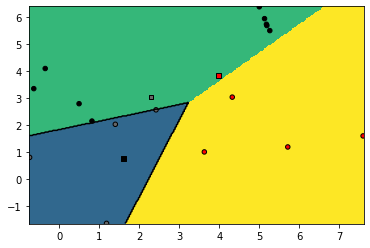

In [57]:
# nauči parametre (X i Yoh_ moraju biti tipa torch.Tensor):
ptlr.train(X, Yoh_, 1000, 0.1, param_lambda)

# dohvati vjerojatnosti na skupu za učenje
probs = ptlr.evaluate(X.detach().numpy())

# ispiši performansu (preciznost i odziv po razredima)
accuracy, pr, M = data.eval_perf_multi(probs, Y_)
print("Accuracy: ", accuracy)
for i in range(3):
    print("Precision & recall for class", i, ": ", pr[i])


# iscrtaj rezultate, decizijsku plohu
rect = (np.min(X.numpy(), axis=0), np.max(X.numpy(), axis=0))
data.graph_surface(lambda X: ptlr.evaluate(X), rect)
data.graph_data(X, Y_, probs)
plt.show()

In [58]:
param_lambda=0.0001

iter: 0 loss: 0.455033
iter: 100 loss: 0.453401
iter: 200 loss: 0.452043
iter: 300 loss: 0.450894
iter: 400 loss: 0.449907
iter: 500 loss: 0.449050
iter: 600 loss: 0.448298
iter: 700 loss: 0.447633
iter: 800 loss: 0.447042
iter: 900 loss: 0.446513
Accuracy:  0.85
Precision & recall for class 0 :  (0.8, 0.8)
Precision & recall for class 1 :  (0.9, 0.8181818181818182)
Precision & recall for class 2 :  (0.8, 1.0)


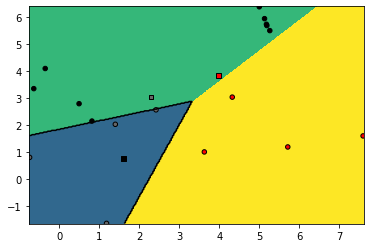

In [59]:
# nauči parametre (X i Yoh_ moraju biti tipa torch.Tensor):
ptlr.train(X, Yoh_, 1000, 0.1, param_lambda)

# dohvati vjerojatnosti na skupu za učenje
probs = ptlr.evaluate(X.detach().numpy())

# ispiši performansu (preciznost i odziv po razredima)
accuracy, pr, M = data.eval_perf_multi(probs, Y_)
print("Accuracy: ", accuracy)
for i in range(3):
    print("Precision & recall for class", i, ": ", pr[i])


# iscrtaj rezultate, decizijsku plohu
rect = (np.min(X.numpy(), axis=0), np.max(X.numpy(), axis=0))
data.graph_surface(lambda X: ptlr.evaluate(X), rect)
data.graph_data(X, Y_, probs)
plt.show()

In [60]:
param_lambda=0.01

iter: 0 loss: 0.475085
iter: 100 loss: 0.474554
iter: 200 loss: 0.474275
iter: 300 loss: 0.474072
iter: 400 loss: 0.473908
iter: 500 loss: 0.473770
iter: 600 loss: 0.473651
iter: 700 loss: 0.473547
iter: 800 loss: 0.473454
iter: 900 loss: 0.473371
Accuracy:  0.8
Precision & recall for class 0 :  (0.6, 0.75)
Precision & recall for class 1 :  (0.9, 0.75)
Precision & recall for class 2 :  (0.8, 1.0)


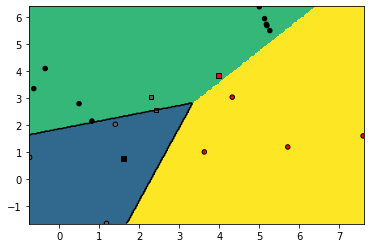

In [61]:
# nauči parametre (X i Yoh_ moraju biti tipa torch.Tensor):
ptlr.train(X, Yoh_, 1000, 0.1, param_lambda)

# dohvati vjerojatnosti na skupu za učenje
probs = ptlr.evaluate(X.detach().numpy())

# ispiši performansu (preciznost i odziv po razredima)
accuracy, pr, M = data.eval_perf_multi(probs, Y_)
print("Accuracy: ", accuracy)
for i in range(3):
    print("Precision & recall for class", i, ": ", pr[i])


# iscrtaj rezultate, decizijsku plohu
rect = (np.min(X.numpy(), axis=0), np.max(X.numpy(), axis=0))
data.graph_surface(lambda X: ptlr.evaluate(X), rect)
data.graph_data(X, Y_, probs)
plt.show()

In [62]:
param_lambda=0.1

iter: 0 loss: 0.729210
iter: 100 loss: 0.686947
iter: 200 loss: 0.671021
iter: 300 loss: 0.662390
iter: 400 loss: 0.656642
iter: 500 loss: 0.652509
iter: 600 loss: 0.649467
iter: 700 loss: 0.647229
iter: 800 loss: 0.645602
iter: 900 loss: 0.644442
Accuracy:  0.8
Precision & recall for class 0 :  (0.6, 0.75)
Precision & recall for class 1 :  (0.9, 0.75)
Precision & recall for class 2 :  (0.8, 1.0)


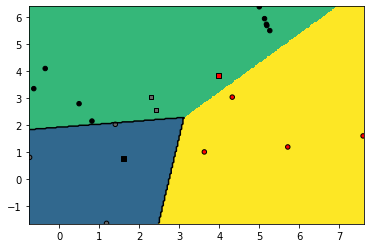

In [63]:
# nauči parametre (X i Yoh_ moraju biti tipa torch.Tensor):
ptlr.train(X, Yoh_, 1000, 0.1, param_lambda)

# dohvati vjerojatnosti na skupu za učenje
probs = ptlr.evaluate(X.detach().numpy())

# ispiši performansu (preciznost i odziv po razredima)
accuracy, pr, M = data.eval_perf_multi(probs, Y_)
print("Accuracy: ", accuracy)
for i in range(3):
    print("Precision & recall for class", i, ": ", pr[i])


# iscrtaj rezultate, decizijsku plohu
rect = (np.min(X.numpy(), axis=0), np.max(X.numpy(), axis=0))
data.graph_surface(lambda X: ptlr.evaluate(X), rect)
data.graph_data(X, Y_, probs)
plt.show()

In [64]:
param_lambda=1.0

iter: 0 loss: 1.920190
iter: 100 loss: 1.099411
iter: 200 loss: 1.047629
iter: 300 loss: 1.056027
iter: 400 loss: 1.056062
iter: 500 loss: 1.056116
iter: 600 loss: 1.056127
iter: 700 loss: 1.056129
iter: 800 loss: 1.056129
iter: 900 loss: 1.056129
Accuracy:  0.55
Precision & recall for class 0 :  (0.0, nan)
Precision & recall for class 1 :  (1.0, 0.5263157894736842)
Precision & recall for class 2 :  (0.2, 1.0)


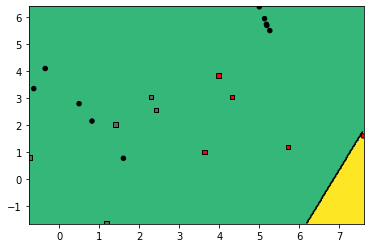

In [65]:
# nauči parametre (X i Yoh_ moraju biti tipa torch.Tensor):
ptlr.train(X, Yoh_, 1000, 0.1, param_lambda)

# dohvati vjerojatnosti na skupu za učenje
probs = ptlr.evaluate(X.detach().numpy())

# ispiši performansu (preciznost i odziv po razredima)
accuracy, pr, M = data.eval_perf_multi(probs, Y_)
print("Accuracy: ", accuracy)
for i in range(3):
    print("Precision & recall for class", i, ": ", pr[i])


# iscrtaj rezultate, decizijsku plohu
rect = (np.min(X.numpy(), axis=0), np.max(X.numpy(), axis=0))
data.graph_surface(lambda X: ptlr.evaluate(X), rect)
data.graph_data(X, Y_, probs)
plt.show()

# 5. Konfigurabilni duboki modeli u PyTorchu (20% bodova)